In [372]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [373]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [374]:
import git
git = git.Git("../../../sonarqube/") 

### Import builds and jobs

In [375]:
builds = pd.read_csv(f"{csv_folder}/builds_cleaned.csv", index_col=0)

In [376]:
jobs = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)
jobs

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
0,241946101,241946099,2017-06-12T09:21:03Z,2017-06-12T09:13:51.063Z,2017-06-12T09:21:43Z,25614.1,canceled,2018-06-02T14:51:19.734Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
1,241946103,241946099,2017-06-12T09:22:43Z,2017-06-12T09:13:51.107Z,2017-06-12T09:21:43Z,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
2,241952024,241952022,2017-06-12T09:36:43Z,2017-06-12T09:32:52.227Z,2017-06-12T09:37:23Z,25615.1,canceled,2018-06-02T14:51:25.661Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
3,241952025,241952022,NaN,2017-06-12T09:32:52.237Z,2017-06-12T09:37:24Z,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
4,241952045,241952044,2017-06-12T09:42:16Z,2017-06-12T09:32:59.994Z,2017-06-12T09:53:48Z,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136978,315411337,315411335,2017-12-12T15:23:15Z,2017-12-12T15:22:41.091Z,2017-12-12T15:26:39Z,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...
136979,315421139,315421138,2017-12-12T15:43:05Z,2017-12-12T15:42:34.642Z,2017-12-12T15:44:59Z,34812.1,passed,2018-06-03T16:57:47.762Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136980,315421140,315421138,2017-12-12T15:43:26Z,2017-12-12T15:42:34.682Z,2017-12-12T15:44:25Z,34812.2,passed,2018-06-03T16:57:47.778Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136981,315421147,315421146,2017-12-12T15:43:25Z,2017-12-12T15:42:40.583Z,2017-12-12T16:01:05Z,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...


### Pull Requests commits

In [377]:
pr_commits = pd.read_csv(f"{csv_folder}/pr_commits.csv", index_col=0)

### Import all tag comparisons dataset

In [378]:
compare_tags = pd.read_csv(f"{csv_folder}/compare_tags_sha.csv", index_col=0)
compare_tags.head(2)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18
1,8.4.0.35506,2020-07-03 07:09:27,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,0,8.4.1.35646,2020-07-14 08:13:18


### Import tags

In [379]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags.actual_release_date = pd.to_datetime(alltags.actual_release_date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
alltags.rename(columns={"Date":"release_date"}, inplace=True)
tags = alltags.tail(-1)
tags.head()

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2


### Filter the ones after the project started using TravisCI

In [380]:
tags = tags[tags.release_date > "2015-03-10"]

In [381]:
tags.Tag.nunique()

56

### Import tag comparison pairs

In [422]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated_no_rc_and_milestones.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison

,from_author_date,to_author_date,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
0,2015-10-16 09:31:18,2016-04-08 13:44:39,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
43,2015-04-02 08:09:45,2015-06-02 08:34:06,5.1,5.1.1,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
66,2015-06-02 08:34:06,2015-07-27 08:03:21,5.1.1,5.1.2,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646
90,2015-07-27 08:03:21,2015-11-02 08:56:19,5.1.2,5.2,2853,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,f045be98be3ba032b6b19d71574038eeeb91803b,2853,98 days 00:52:58,98.036782,2015-07-27 10:03:21,2015-11-02 09:56:19,97 days 23:52:58,97.995116
115,2015-11-02 08:56:19,2016-01-08 10:09:15,5.2,5.3,561,0,f045be98be3ba032b6b19d71574038eeeb91803b,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,561,67 days 01:12:56,67.050648,2015-11-02 09:56:19,2016-01-08 11:09:15,67 days 01:12:56,67.050648
141,2016-01-08 10:09:15,2016-03-08 15:48:19,5.3,5.4,438,0,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,7b02df9be3cd9448699b5857586e1c6e2b28c007,438,60 days 05:39:04,60.235463,2016-01-08 11:09:15,2016-03-08 16:48:19,60 days 05:39:04,60.235463
168,2016-03-08 15:48:19,2016-05-02 14:09:29,5.4,5.5,725,0,7b02df9be3cd9448699b5857586e1c6e2b28c007,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,725,54 days 22:21:10,54.931366,2016-03-08 16:48:19,2016-05-02 16:09:29,54 days 23:21:10,54.973032
196,2016-05-02 14:09:29,2016-06-01 11:59:09,5.5,5.6,349,0,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,074f3d1169f9688d15af4aff67e7e672cbeed782,349,29 days 21:49:40,29.909491,2016-05-02 16:09:29,2016-06-01 13:59:09,29 days 21:49:40,29.909491
225,2016-06-01 11:59:09,2016-07-25 08:13:12,5.6,5.6.1,32,0,074f3d1169f9688d15af4aff67e7e672cbeed782,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,32,53 days 20:14:03,53.843090,2016-06-01 13:59:09,2016-07-25 10:13:12,53 days 20:14:03,53.843090
255,2016-07-25 08:13:12,2016-09-19 14:34:40,5.6.1,5.6.2,25,0,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,9c1c190107023ffca5f67d6d0184ff5371c5347f,25,56 days 06:21:28,56.264907,2016-07-25 10:13:12,2016-09-19 16:34:40,56 days 06:21:28,56.264907


### Import issues

In [423]:
issues = pd.read_csv(f"{csv_folder}/issues_community.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

,updated,environment,creator,issue_id,reporter,issuetype_name,issue_key,assignee,votes,created,project,resolutiondate,status_id,summary,reporter_name,resolution_name,lastViewed,issuetype_id,edition,duedate,status_name,votes_votes,description,priority_id,priority_name,status,assignee_name,creator_name,created_month,created_year
0,2020-09-29 08:54:53+00:00,NaN,Julien Lancelot,97898,Julien Lancelot,Task,SONAR-13913,NaN,0,2020-09-29 08:54:53+00:00,SONAR,NaT,1,Remove table clean up used in Integration Tests,julien.lancelot,NaN,NaT,3,Community,NaT,Open,0,- Remove org.sonar.server.platform.BackendClea...,3,Major,Open,NaN,julien.lancelot,9,2020
1,2020-09-28 10:18:24+00:00,NaN,Malena Ebert,97868,Malena Ebert,Task,SONAR-13912,Malena Ebert,0,2020-09-28 10:14:16+00:00,SONAR,NaT,1,Add OWASP Dependency Check task to Cirrus CI,malena.ebert,NaN,NaT,3,Community,NaT,Open,0,The goal of this task is to detect vulnerabili...,3,Major,Open,malena.ebert,malena.ebert,9,2020
3,2020-09-28 15:38:40+00:00,NaN,Jeremy Davis,97858,Jeremy Davis,New Feature,SONAR-13909,Julien Lancelot,0,2020-09-28 09:20:49+00:00,SONAR,NaT,10002,C# and VB.NET analysis updates,jeremy.davis,NaN,NaT,2,Community,2020-10-05 00:00:00+00:00,In Review,0,The C# analysis now improves complexity rules ...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
4,2020-09-28 20:02:41+00:00,NaN,Jeremy Davis,97855,Jeremy Davis,Improvement,SONAR-13907,Julien Lancelot,0,2020-09-28 09:00:01+00:00,SONAR,NaT,10002,JavaScript/TypeScript analysis updates,jeremy.davis,NaN,NaT,4,Community,2020-10-05 00:00:00+00:00,In Review,0,The changes are:\r\n* a new rule to detect XXE...,3,Major,In Review,julien.lancelot,jeremy.davis,9,2020
5,2020-09-24 12:57:08+00:00,NaN,Mathieu Cutivel,97813,Mathieu Cutivel,Improvement,SONAR-13906,Mathieu Cutivel,0,2020-09-24 12:57:00+00:00,SONAR,NaT,3,Prevent ALM binding configuration modal from c...,mathieu.cutivel,NaN,NaT,4,Community,2020-10-01 00:00:00+00:00,In Progress,0,When clicking outside of the ALM configuration...,3,Major,In Progress,mathieu.cutivel,mathieu.cutivel,9,2020


In [424]:
issues.shape

(4478, 30)

### Import issue versions

In [425]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import Pull request data

In [426]:
prs = pd.read_csv(f"{csv_folder}/prs.csv", index_col=0)

In [427]:
prs

,pr_number,title,base_sha,base_ref,head_sha,head_ref
0,2015,SONAR-9122 prevent setting a project as private,b10cb50ec7c26a85dd549de6633e60705994bd66,master,13bb5a131e0fa2c20f041d4e8c79e847fc601348,feature/stas/lock-private-projects
1,2008,Upgrade scanner in performance tests,7b2958e443c4c629f3e35aba7182d7cb524b250b,master,9a90c2f7097fab8fe94681b1e7ea09294a308314,feature/sb/sonar-runner-in-its
2,2026,SQ 6.4 web hardening 5,87d60ccc748d84f55f7c102b6ec6d489215eef8f,master,368935160f780caf8a9b7ff250606e84c68c50cb,feature/greg/6.4_web_hardening_5
3,2046,Hardening Wednesday,7f939f50b63f7c6ac7aab6d8fbb71a06193df0be,master,285e16edf389aa34db2bc2f0ce99a2e3042f3f32,feature/tb/hardening-wednesday
4,2021,SONAR-6135 Upgrade MySQL driver to 5.1.42,6d18fa56e8782e022169738587750dfe59b4015a,master,da23d42a0af4db59d7aeac71dd51f659b43f763b,feature/eh/SONAR-6135
...,...,...,...,...,...,...
3244,610,SONAR-6919 Enforce some mandatory web service ...,526e3b9053582e4921d705c35a4b24d3cd9d0d60,master,526e3b9053582e4921d705c35a4b24d3cd9d0d60,feature/ws_enforce_mandatory_fields
3245,620,SONAR-6922 Initial version of report viewer,7567526369d1082a8023623c016b970cac314c64,master,eb5fd4fe77eb1b82b3aa5e1c3474d85ac39ee9ce,feature/report_viewer
3246,639,SONAR-7027 Add developer concept in CE,30e7baee5a1785168c2e2c2bcea73ae1a78087da,master,240cf9f64ff0d7aa1e94f4fdeeb449f48141bcb0,feature/introduce_dev_in_ce
3247,602,SONAR-6834 Purge CE_ACTIVITY when deleting a p...,19350f7eb06f0f46674ad394e0919edbae2b2a2a,branch-5.2,8d809c371e9b00c1886b1f7e83d8699e546bdb0e,feature/delete_ce_activity_when_del_project


### Import tags commits difference

In [428]:
tags_comparison_commits = pd.read_csv(f"{csv_folder}/tags_comparison_commits_no_rc_and_milestones.csv", index_col=0)
tags_comparison_commits

,from_tag,to_tag,ahead_sha
0,4.5.6,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83
1,4.5.6,4.5.7,8cd20603bdbff2d725a3ba981839120b8d40faac
2,4.5.6,4.5.7,d0d9715a973793e5c8fc0ada606f70ffc7f08bf7
3,4.5.6,4.5.7,36d9a7959a95cbe44550e2c7790bf68d4c1066c8
4,4.5.6,4.5.7,75d7c7ff807aa0c081935fe8c93095277e6fe497
...,...,...,...
15600,8.4.0.35506,8.4.1.35646,08e36b12704d8ac30f56d3d5ecf73d5457424b5c
15601,8.4.1.35646,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a
15602,8.4.1.35646,8.4.2.36762,ed1a72601c559e86ccd96004c99157421b6bcb20
15603,8.4.1.35646,8.4.2.36762,7721c3eeab3202e91fb9c87dfaec4ba3a7b4d0df


In [429]:
data = [] 
merge_data = []
def get_n_jobs(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    for jobid in j.id:
        data.append((row.from_tag, row.to_tag, jobid))
    return len(j)

def get_n_merge_jobs(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    for jobid in j.id:
        data.append((row.from_tag, row.to_tag, jobid))
    return len(j[j.commitref.str.contains("merge").fillna(False)])

def get_n_builds(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    return len(builds[builds.id.isin(j.buildid)])

def get_n_pull_request_jobs(row):
    tags_comparison_commits_example = tags_comparison_commits[(tags_comparison_commits.from_tag==row.from_tag) \
                                    & (tags_comparison_commits.to_tag==row.to_tag)].ahead_sha

    #commits_pr = pr_commits[pr_commits.commitsha.isin(tags_comparison_commits_example)]
    pull_requests = prs[prs.head_sha.isin(tags_comparison_commits_example)]
    
    df = []
    for i, pr_number in enumerate(pull_requests.pr_number.unique()):
        if i == 0:
            df = jobs[jobs.commitref.str.contains(f"pull/{pr_number}").fillna(False)]
        else:
            df = pd.concat([df, jobs[jobs.commitref.str.contains(f"pull/{pr_number}").fillna(False)]])           
    if(len(df)>0):
        for jobid in df.id:
            merge_data.append((row.from_tag, row.to_tag, jobid))
    return len(df)

In [430]:
tags_comparison["n_jobs"] = tags_comparison.apply(get_n_jobs, axis=1)
tags_comparison["n_builds"] = tags_comparison.apply(get_n_builds, axis=1)
tags_comparison["n_merge_jobs"] = tags_comparison.apply(get_n_merge_jobs, axis=1)

from :https://docs.travis-ci.com/user/pull-requests/#double-builds-on-pull-requests
* Rather than build the commits that have been pushed to the branch the pull request is from, we build the merge between the source branch and the upstream branch.

When only looking at the difference in commits between the two tags we may miss out on some pull request builds because Travis CI does not build the commits from the source branch (which are the commits we get as difference) but "fictive commits" which are the merge of the source and upstream branch.
Therefore in order to get a complete picture of the process of development of the release, we need to include these as well.

We do it by retrieving for each difference commit the pull request which match that commit in their head commit (the commit which is to be merged into the target branch). We noticed that Sonarqube does not use merge commits and therefore shas are kept when pull requests succeed. Once the list of pull requests is obtained, we query all the jobs which are associated with that pull request via its number.

In [431]:
tags_comparison["n_pull_request_jobs"] = tags_comparison.apply(get_n_pull_request_jobs, axis=1)

<AxesSubplot:xlabel='n_pull_request_jobs'>

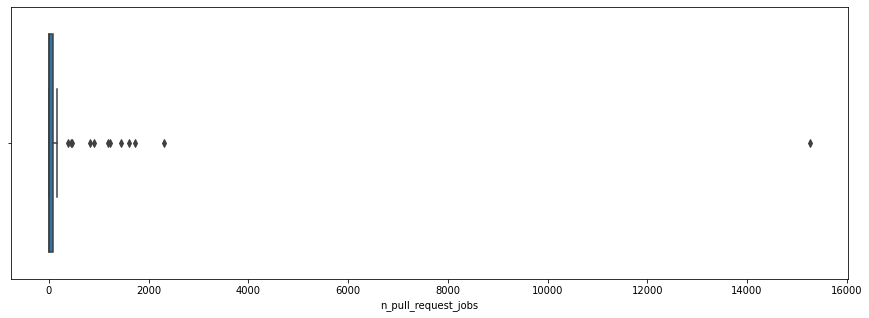

In [432]:
sns.boxplot(x=tags_comparison.n_pull_request_jobs)

In [433]:
tags_comparison[["from_tag", "to_tag", "ahead_by", "n_jobs","n_builds","n_merge_jobs","n_pull_request_jobs"]]

,from_tag,to_tag,ahead_by,n_jobs,n_builds,n_merge_jobs,n_pull_request_jobs
0,4.5.6,4.5.7,7,0,0,0,0
43,5.1,5.1.1,7,0,0,0,0
66,5.1.1,5.1.2,12,0,0,0,7
90,5.1.2,5.2,2853,10933,2031,23,15255
115,5.2,5.3,561,4852,511,0,2309
141,5.3,5.4,438,3879,431,0,1449
168,5.4,5.5,725,3873,552,0,1617
196,5.5,5.6,349,2478,354,0,1197
225,5.6,5.6.1,32,217,31,0,42
255,5.6.1,5.6.2,25,168,24,0,61


**Dataframes with job ids from difference commits and jobs ids from pull requests for each pair**

In [434]:
tags_jobs = pd.DataFrame(data, columns=["from_tag", "to_tag", "job_id"])

In [435]:
tags_merge_jobs = pd.DataFrame(merge_data, columns=["from_tag", "to_tag", "job_id"])

Do some jobs appear in both datasets?

In [436]:
tags_merge_jobs[tags_merge_jobs.job_id.isin(tags_jobs.job_id)]

,from_tag,to_tag,job_id


**Do some pull request appear in more than one pair?**

In [437]:
x = tags_merge_jobs.groupby("job_id").from_tag.count()
len(x[x>1])

1935

In [438]:
len(x)

26504

Yes, we have 1935 job ids from pull requests which repeat. We investigate why.

In [440]:
job_id = x[x>1].index[0]
jobs[jobs.id == job_id]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
63575,153329639,153329638,2016-08-18T16:38:40Z,2016-08-18T16:38:16.530Z,2016-08-18T16:59:14Z,12485.1,passed,2018-05-31T06:48:17.734Z,3b6712add9f13559c1d35f06fadf6fe7ede01ff3,43555978,SONAR-6846 support duplicate snapshots with is...,refs/pull/1152/merge,https://github.com/SonarSource/sonarqube/pull/...


In [441]:
tags_merge_jobs[tags_merge_jobs.job_id == job_id]

,from_tag,to_tag,job_id
21876,5.6.1,5.6.2,153329639
23961,6.0,6.1,153329639


In [442]:
prs[prs.pr_number == 1152]

,pr_number,title,base_sha,base_ref,head_sha,head_ref
176,1152,SONAR-6846 support duplicate snapshots with is...,54e5d34f816386987a5ccd0634e311d692a64588,branch-5.6,d94aa825004f0c8666690da143d466d71b31388d,feature/sl/SONAR-6846/support_duplicate_snapsh...


Looks like it is a new feature which was introduced both in a old version and cherry picked in the upcoming one
* We accept that some builds may affect more than one pair. The way we created pairs is that they are matched with the most similar version (ideally the one it was branched from). This does not prevent developers from cherry picking changes from other branches or fixes to other tags. This would still be considered a change from the previous tag.

### Analyse the type of pull requests for each pair

In [443]:
data = []
def pull_requests_analysis(row):
    if row.name == 873:
        return
    tags_comparison_commits_example = tags_comparison_commits[(tags_comparison_commits.from_tag==row.from_tag) \
                                    & (tags_comparison_commits.to_tag==row.to_tag)].ahead_sha

    commits_pr = pr_commits[pr_commits.commitsha.isin\
           (tags_comparison_commits_example)]
    
    #pull_requests = prs[prs.pr_number.isin(commits_pr.pr_number)]
    pull_requests = prs[prs.head_sha.isin(tags_comparison_commits_example)]
    
    pr_merged_in_master = 0
    pr_merged_in_feature_branch = 0
    pr_merged_from_master = 0
    pr_merged_from_feature_branch = 0
    branches_to_analyse = []
    print("-"*20)
    print(f"{row.from_tag}->{row.to_tag}")
    for i, pr in pull_requests.iterrows():
        added = False
        #base
        if("master" == pr.base_ref):
            pr_merged_in_master+=1
        else:
            branches_to_analyse.append((pr.base_ref, pr.base_sha, pr.head_ref, pr.head_sha))
            added=True
            pr_merged_in_feature_branch+=1
        #head
        if("master" == pr.head_ref):
            pr_merged_from_master+=1
        else:
            if(not added):
                branches_to_analyse.append((pr.base_ref, pr.base_sha, pr.head_ref, pr.head_sha))
            pr_merged_from_feature_branch+=1
    
    print(f"pr_merged_in_master: {pr_merged_in_master}")
    print(f"pr_merged_in_feature_branch: {pr_merged_in_feature_branch}")
    print(f"pr_merged_from_master: {pr_merged_from_master}")
    print(f"pr_merged_from_feature_branch: {pr_merged_from_feature_branch}")
            
    for branch in branches_to_analyse:
        data.append((row.from_tag, row.to_tag, branch[0], branch[1], branch[2], branch[3]))
        print(f"{branch[0]}, sha {branch[1][:6]}, {branch[2]}, sha {branch[3][:6]} has number jobs:", len(jobs[jobs.commitref==f"refs/heads/{branch[0]}"]))

In [444]:
x = tags_comparison.iloc[:-2]
x.apply(pull_requests_analysis, axis=1)

--------------------
4.5.6->4.5.7
pr_merged_in_master: 0
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 0
--------------------
5.1->5.1.1
pr_merged_in_master: 0
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 0
--------------------
5.1.1->5.1.2
pr_merged_in_master: 0
pr_merged_in_feature_branch: 2
pr_merged_from_master: 0
pr_merged_from_feature_branch: 2
branch-5.1, sha 5b63bf, feature/fix_notif_manager_preview, sha 5a0253 has number jobs: 0
branch-5.1, sha d7a4e5, feature/SONAR-6700_in_5.1, sha d7a4e5 has number jobs: 0
--------------------
5.1.2->5.2
pr_merged_in_master: 247
pr_merged_in_feature_branch: 21
pr_merged_from_master: 1
pr_merged_from_feature_branch: 267
master, sha f14a07, feature/cache_issues_mode, sha 91c3be has number jobs: 24092
master, sha 2bfefb, feature/views_in5.2, sha 2bfefb has number jobs: 24092
master, sha 2c5b24, feature/views_component_persistence, sha b3101c has number jobs: 2409

master, sha e51e9c, feature/blame_from_db_only_on_none_modified_files, sha 48ba89 has number jobs: 24092
branch-5.2, sha f6c9ff, feature/bad_encoding_in_ce, sha 1fabcd has number jobs: 522
master, sha 964ce2, feature/cetaskprocessor, sha 8c2148 has number jobs: 24092
master, sha d2a19c, feature/sync_rules, sha 475074 has number jobs: 24092
master, sha 098778, feature/display_ce_id, sha 348cf1 has number jobs: 24092
branch-5.2, sha a9d76b, feature/lang_name_in_rule_search, sha 7c0b24 has number jobs: 522
master, sha 28ae34, feature/batch_hardening, sha d99954 has number jobs: 24092
branch-5.2, sha d5ca92, feature/5.2-qprofile-ie, sha d66cae has number jobs: 522
master, sha 5f1b48, feature/view_task, sha cf7468 has number jobs: 24092
branch-5.2, sha a11430, feature/better_WS_response_when_DB_is_out, sha cb433c has number jobs: 522
branch-5.2, sha e762ad, feature/improve_notif_perf, sha 9afa62 has number jobs: 522
master, sha 52014e, feature/ws_usergroups_becomes_user_groups, sha 52014e h

master, sha 055131, feature/add_java_ws_uninstall_plugin, sha 9e2100 has number jobs: 24092
master, sha 9595b0, feature/server/ce_tests, sha e35378 has number jobs: 24092
master, sha 1ed423, feature/java_ws_installed_plugins, sha 86a26e has number jobs: 24092
master, sha a79c79, feature/threads_should_be_named, sha b7e670 has number jobs: 24092
master, sha 5145ac, feature/dependencies_report, sha 43b3d2 has number jobs: 24092
master, sha 1cd940, feature/add_java_ws_pending_plugins, sha e8b52f has number jobs: 24092
master, sha f8df0d, feature/ce_tests_proto, sha 5b0536 has number jobs: 24092
master, sha da53f6, feature/add_java_ws_to_update_plugin, sha 6600b6 has number jobs: 24092
master, sha c0a188, feature/line_of_closed_issues, sha 8ad882 has number jobs: 24092
master, sha 0dc04c, feature/server/compute_sources, sha 9a934d has number jobs: 24092
master, sha a196b0, feature/server/persist_highlighting, sha 5c576f has number jobs: 24092
master, sha cf172b, feature/server/ce_dep_lib, 

master, sha a98d46, feature/drop_module_pico_extension, sha 266e31 has number jobs: 24092
master, sha df0b8c, feature/restore_tasks, sha 01570a has number jobs: 24092
master, sha d544f0, feature/remove_views_task, sha 5d35e6 has number jobs: 24092
master, sha 526e3b, feature/ws_enforce_mandatory_fields, sha 526e3b has number jobs: 24092
master, sha 756752, feature/report_viewer, sha eb5fd4 has number jobs: 24092
master, sha 30e7ba, feature/introduce_dev_in_ce, sha 240cf9 has number jobs: 24092
--------------------
5.3->5.4
pr_merged_in_master: 43
pr_merged_in_feature_branch: 5
pr_merged_from_master: 0
pr_merged_from_feature_branch: 48
master, sha 8239ac, feature/tb/components_tree, sha 6fe8b0 has number jobs: 24092
master, sha 6fe8b0, feature/module_dup, sha d1e303 has number jobs: 24092
master, sha 13a6da, fix/project_lock, sha 8239ac has number jobs: 24092
master, sha e8d0c5, fix_npm, sha d29b16 has number jobs: 24092
master, sha a2cf8a, feature/tb/leak_period, sha a2cf8a has number 

master, sha 4aa44f, feature/tb/drop_action_api, sha 4aa44f has number jobs: 24092
master, sha 77a92e, feature/web-context, sha 77a92e has number jobs: 24092
master, sha 006b48, feature/dev-measures, sha 9d3436 has number jobs: 24092
branch-5.5, sha 100bc5, feature/tb/fix-ce-task-types, sha 48a894 has number jobs: 392
--------------------
5.5->5.6
pr_merged_in_master: 55
pr_merged_in_feature_branch: 5
pr_merged_from_master: 0
pr_merged_from_feature_branch: 60
master, sha 4c56e6, feature/tb/project_status_browse_permission, sha 4c56e6 has number jobs: 24092
master, sha aa9847, feature/prevent_sonar_module_id, sha cadc0c has number jobs: 24092
master, sha 35997d, feature/sl/SONAR-7534, sha 30938a has number jobs: 24092
master, sha 27aa65, feature/tb/update_key_with_functional_errors, sha 27aa65 has number jobs: 24092
master, sha 3efea9, feature/report_warning, sha f49762 has number jobs: 24092
master, sha a956de, feature/jl/dbcleaner_should_keep_last_snapshot, sha 9ac7dc has number jobs: 

master, sha 3a27ef, feature/jl/use_X_FORWARDED_PROTO_to_detect_https, sha be5552 has number jobs: 24092
master, sha be5552, feature/dm/sensor_error, sha ae5a68 has number jobs: 24092
master, sha 90b5fc, feature/sl/SONAR-7719/remove_version_does_not_remove_version_on_snapshot, sha 708f38 has number jobs: 24092
master, sha 57ad62, feature/tb/dates-quality-profiles, sha 655df7 has number jobs: 24092
master, sha d3b7c3, feature/sl/SONAR-7804/dont_create_events_on_module_in_old_ws, sha 3a27ef has number jobs: 24092
master, sha 38c6a8, feature/sl/uuids_in_resource_index, sha a327a9 has number jobs: 24092
master, sha d30b7d, feature/jl/delete_perm_char_when_deleting_perm_tpl, sha 7e5f6d has number jobs: 24092
master, sha a4e056, feature/sonarlint_api, sha e58184 has number jobs: 24092
master, sha fdff0e, feature/sl/file-move, sha 868da6 has number jobs: 24092
master, sha dd67aa, feature/sl/faster_slug, sha 9e291c has number jobs: 24092
master, sha 0e78a4, feature/tb/apply_project_creator, sha

master, sha 194758, feature/sl/SONAR-7909/reset_sharedmemory_at_startup, sha 4f877f has number jobs: 24092
master, sha 0b92cb, feature/tb/settings_validations, sha 50b630 has number jobs: 24092
master, sha 1624eb, feature/jl/send_email_should_not_generate_error_500, sha e34336 has number jobs: 24092
master, sha 43eb45, feature/jl/valid_ip_adresses, sha a08329 has number jobs: 24092
master, sha e03729, feature/jl/reset_use_keys, sha e71ab3 has number jobs: 24092
master, sha 02a4a3, feature/tb/hardening-20160912, sha 547cf0 has number jobs: 24092
master, sha fefad9, feature/jh/ssl_test, sha 011a9f has number jobs: 24092
branch-5.6, sha 0ec0be, feature/jl/fix_add_project_to_qprofile, sha a56e60 has number jobs: 777
master, sha b4ba24, feature/jl/fixes, sha bf9c3d has number jobs: 24092
master, sha 7ef29c, feature/jl/fix_no_server_id_check_in_licenses_list, sha 1624eb has number jobs: 24092
master, sha 037cba, feature/tb/generate_server_id, sha 7ef29c has number jobs: 24092
master, sha d39

master, sha 25a690, feature/sb/org-in-permission-templates, sha 7d9c99 has number jobs: 24092
master, sha e49f90, feature/sl/SONAR-8100/check_user_organization_in_ws_organizations_delete, sha ff99d2 has number jobs: 24092
master, sha 59887e, feature/jl/merge_coverage_in_file_sources, sha ae09c8 has number jobs: 24092
master, sha 4b54fa, feature/jl/load_sso_settings_only_at_startup, sha aeb728 has number jobs: 24092
master, sha aeb728, feature/jl/fix_perf, sha 808661 has number jobs: 24092
master, sha 1609c6, feature/jl/merge_coverage, sha 331558 has number jobs: 24092
master, sha 72dac3, feature/jl/add_qgate_filter_in_search_projects_ws, sha 09d6b7 has number jobs: 24092
master, sha c54580, feature/jl/fix_index_project_measure_without_analysis_on_mysql, sha e49f90 has number jobs: 24092
feature/sl/SONAR-8192/root_system_administer_backward_compatibility, sha d87451, feature/sl/SONAR-8172/check_user_organization_in_ws_organization_update, sha 72dac3 has number jobs: 30
master, sha e393f

master, sha d75388, feature/jl/create_logout_ws, sha 1b181d has number jobs: 24092
master, sha 74c5ca, feature/jl/improve_navigation_component, sha 79a8e5 has number jobs: 24092
master, sha ca3269, feature/tb/update_event, sha 5686fc has number jobs: 24092
master, sha f89255, feature/sl/restore_root_related_stuff, sha 23523a has number jobs: 24092
master, sha 30168d, feature/jl/fix_set_type_permission, sha 1dcd20 has number jobs: 24092
master, sha 60f2dd, sonar_profile_issues_mode, sha 750fd4 has number jobs: 24092
master, sha 203fc0, feature/daniel/MMF-659/faster_global_search, sha 501e59 has number jobs: 24092
master, sha 8063f2, feature/sl/SONAR-8682/fix_ws_template_groups, sha 0584dc has number jobs: 24092
master, sha deb248, feature/jl/fix_issues_bulk_change, sha 3f8b25 has number jobs: 24092
master, sha a9c56c, feature/tb/measures_history, sha be36f3 has number jobs: 24092
master, sha 07849e, reverse_issue_flows, sha 7ad931 has number jobs: 24092
master, sha 3f8b25, feature/jl/re

master, sha 45ae78, feature/teryk/harden-duplications-show, sha 96672b has number jobs: 24092
master, sha 7ea597, feature/sb/SONAR-9302/bad-default, sha 7404d8 has number jobs: 24092
master, sha 71b58b, feature/sl/SONAR-9444/fix_migration_of_projects_to_public_or_private, sha b8a687 has number jobs: 24092
master, sha 70b689, feature/teryk/sanitize-quality-profiles, sha 998c76 has number jobs: 24092
master, sha 49fca5, feature/teryk/ws-issues-comment, sha 272956 has number jobs: 24092
--------------------
6.5->6.6
pr_merged_in_master: 17
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 17
master, sha c699bd, feature/sl/SONAR-9540/do_not_log_MessageException_from_CE_workers, sha f01745 has number jobs: 24092
master, sha 2cb071, feature/sl/SONAR-9283/trim_reading_types_from_settings, sha fa6d3b has number jobs: 24092
master, sha d5b076, feature/platform/move_worker_count_to_gov, sha 7210ca has number jobs: 24092
master, sha 6361f2, feature/sl/SONAR-94

0       None
43      None
66      None
90      None
115     None
141     None
168     None
196     None
225     None
255     None
261     None
286     None
318     None
351     None
385     None
420     None
493     None
531     None
570     None
609     None
648     None
687     None
726     None
765     None
804     None
843     None
882     None
921     None
927     None
960     None
999     None
1038    None
1077    None
1116    None
1194    None
1233    None
1271    None
1308    None
1344    None
1379    None
1413    None
1446    None
1478    None
1509    None
1512    None
1539    None
1568    None
1623    None
1649    None
1674    None
1698    None
1699    None
dtype: object

In [445]:
merged_branch = pd.DataFrame(data, columns=["from_tag", "to_tag", "base_branch", "base_sha", "head_branch", "head_sha"])

In [446]:
x = merged_branch.groupby(["head_branch", "head_sha"]).to_tag.count().reset_index()

In [447]:
x[x.to_tag > 1]

,head_branch,head_sha,to_tag
229,feature/jl/5.6_SONAR-8144,3fcc98a73d6afb99388e39f46272909a6d6600b2,2
283,feature/jl/fix_add_project_to_qprofile,a56e60d168802ff9dc23ffec978bb412fd501f97,2
456,feature/sb/5.6/test-index,6f621785d7218218432a641e2cbf460763c768f8,2
535,feature/sl/SONAR-10215/branch-6.7/fix_ISE_in_d...,0a1dc2146dd4b142d044c0f85634869410666ed3,2
542,feature/sl/SONAR-10410/rule_system_tags_not_po...,72f64c95fdef18ec950d341c1a9093f30087e1c1,2
549,feature/sl/SONAR-6846/support_duplicate_snapsh...,d94aa825004f0c8666690da143d466d71b31388d,2
584,feature/sl/SONAR-7884/update_center_url_HTTPS,1389151511b840fc40929913a6abd7942f93740c,2
586,feature/sl/SONAR-7896/fix_ISE_in_file_move_det...,a79dddadd5038e9d6bbc26d363e39576180c1063,2
603,feature/sl/SONAR-8148/bullet_proof_FeedFileSou...,82c88c710622c568d91246e2e82cbe4e7be88128,2
623,feature/sl/SONAR-8421/fix_ConcurrentModificati...,9eebecd84d86c76ea513afc0e50573516c6731b8,2


In [448]:
len(merged_branch)

973

In [449]:
merged_branch[merged_branch.head_branch=="feature/jl/5.6_SONAR-8144"]

,from_tag,to_tag,base_branch,base_sha,head_branch,head_sha
559,5.6.2,5.6.3,branch-5.6,c89efd188daf9a0b54faa64bec9d8a514b5e0928,feature/jl/5.6_SONAR-8144,3fcc98a73d6afb99388e39f46272909a6d6600b2
683,6.1.1,6.2,branch-5.6,c89efd188daf9a0b54faa64bec9d8a514b5e0928,feature/jl/5.6_SONAR-8144,3fcc98a73d6afb99388e39f46272909a6d6600b2


In [451]:
y = tags_comparison_commits[(tags_comparison_commits.from_tag=="5.6.2") \
                                    & (tags_comparison_commits.to_tag=="5.6.3")]

In [452]:
z = tags_comparison_commits[(tags_comparison_commits.from_tag=="6.1.1") \
                                    & (tags_comparison_commits.to_tag=="6.2")]

In [453]:
set(y.ahead_sha).intersection(set(z.ahead_sha))

{'216f01bc94a205e57bb837ad239e7f20d9409976',
 '3fcc98a73d6afb99388e39f46272909a6d6600b2',
 '6f621785d7218218432a641e2cbf460763c768f8',
 'a68d912046cfbbe3f9d1493ab53414face1adae2',
 'c89efd188daf9a0b54faa64bec9d8a514b5e0928'}

This confirms that not all pairs have empty intersection. This is okay. Some changes are developed as fix or feature for a version and included into the upcoming one.

In [454]:
tags_comparison[["from_tag", "to_tag"]]

,from_tag,to_tag
0,4.5.6,4.5.7
43,5.1,5.1.1
66,5.1.1,5.1.2
90,5.1.2,5.2
115,5.2,5.3
141,5.3,5.4
168,5.4,5.5
196,5.5,5.6
225,5.6,5.6.1
255,5.6.1,5.6.2


### Import quality metrics

In [455]:
sw_quality_metrics = pd.read_csv(f"{csv_folder}/tags_software_quality_metrics_no_rc_and_milestones.csv", index_col=0)

In [456]:
tags_comparison_sw_metrics = tags_comparison.merge(tags[["Tag","jira_version"]], left_on="to_tag", right_on="Tag", how="left")

In [457]:
tags_comparison_sw_metrics = tags_comparison_sw_metrics.merge(sw_quality_metrics, left_on="jira_version", right_on="version_name", how="left")

In [466]:
#tags_comparison_sw_metrics.to_csv(f"{csv_folder}/tags_pairs_sw_metrics.csv")
tags_comparison_sw_metrics.drop(columns=["from_author_date", "to_author_date", "from_sha", "to_sha",\
                                        "from_commit_date", "to_commit_date", "Tag", "jira_version",\
                                        "diff_author_dates", "diff_commit_dates"]).loc[2:]

,from_tag,to_tag,ahead_by,behind_by,ahead_behind_sum,diff_author_days,diff_commit_days,n_jobs,n_builds,n_merge_jobs,n_pull_request_jobs,version_name,post_release_bugs,pre_release_bugs,pre_release_after_tagging_bugs,dde,critical_post_release_bugs,minor_post_release_bugs,fix_time
2,5.1.1,5.1.2,12,0,12,54.978646,54.978646,0,0,0,7,5.1.2,3.0,0.0,0.0,0.000000,0.0,0.0,-103.197836
3,5.1.2,5.2,2853,0,2853,98.036782,97.995116,10933,2031,23,15255,5.2,48.0,2.0,9.0,0.040000,0.0,5.0,-110.245705
4,5.2,5.3,561,0,561,67.050648,67.050648,4852,511,0,2309,5.3,20.0,3.0,2.0,0.130435,1.0,2.0,-139.124382
5,5.3,5.4,438,0,438,60.235463,60.235463,3879,431,0,1449,5.4,19.0,11.0,7.0,0.366667,1.0,0.0,-100.247500
6,5.4,5.5,725,0,725,54.931366,54.973032,3873,552,0,1617,5.5,9.0,2.0,3.0,0.181818,0.0,1.0,-11.802482
7,5.5,5.6,349,0,349,29.909491,29.909491,2478,354,0,1197,5.6,37.0,1.0,2.0,0.026316,0.0,2.0,-58.067984
8,5.6,5.6.1,32,0,32,53.843090,53.843090,217,31,0,42,5.6.1,9.0,0.0,0.0,0.000000,0.0,1.0,-92.887575
9,5.6.1,5.6.2,25,0,25,56.264907,56.264907,168,24,0,61,5.6.2,2.0,0.0,0.0,0.000000,0.0,0.0,-8.016256
10,5.6.1,6.0,475,0,475,9.046181,9.046181,2674,382,0,1725,6.0,26.0,2.0,1.0,0.071429,1.0,1.0,-51.639551
11,5.6.2,5.6.3,13,0,13,13.973762,13.973762,105,15,0,35,5.6.3,7.0,0.0,0.0,0.000000,0.0,0.0,-75.451000


In [467]:
tags_jobs

,from_tag,to_tag,job_id
0,5.1.2,5.2,64092090
1,5.1.2,5.2,64092619
2,5.1.2,5.2,64095411
3,5.1.2,5.2,64097050
4,5.1.2,5.2,64098578
...,...,...,...
73635,8.4.0.35506,8.4.1.35646,708288742
73636,8.4.1.35646,8.4.2.36762,721967038
73637,8.4.1.35646,8.4.2.36762,721967039
73638,8.4.1.35646,8.4.2.36762,721995805


**How many jobs do we leave out?**

In [475]:
len(set(tags_merge_jobs.job_id).union(set(tags_jobs.job_id))) / jobs.id.nunique()

0.459487673652935

In [479]:
jout = jobs[~jobs.id.isin(set(tags_merge_jobs.job_id).union(set(tags_jobs.job_id)))]

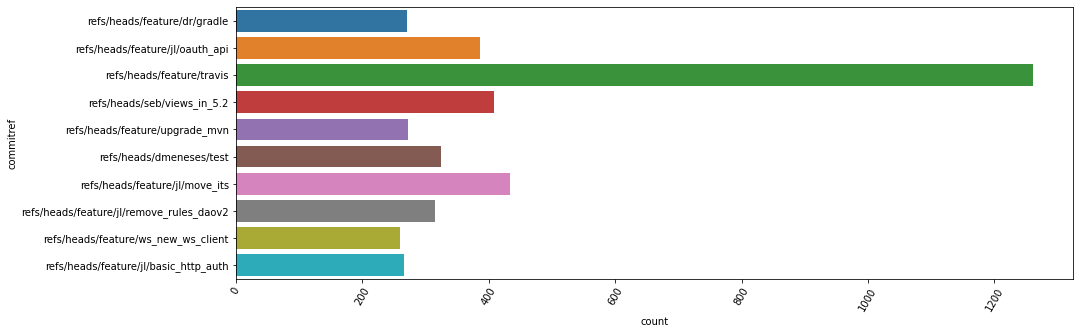

In [498]:
top_commitrefs = jout.commitref.value_counts().sort_values(ascending=False)
ax = sns.countplot(y=jout[jout.commitref.isin(top_commitrefs.head(10).index.tolist())].commitref)
ax.tick_params(axis='x', labelrotation= 60)

In [499]:
jout[jout.commitref==top_commitrefs.index.tolist()[10]]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
8538,115057576,115057575,2016-03-10T13:39:07Z,2016-03-10T13:29:20.106Z,2016-03-10T13:52:56Z,8706.1,passed,2018-05-30T04:32:57.651Z,925d9deb38518b800a5dce956314851b8cb968b7,32512806,SONAR-7435 CE process waiting for WebServer to...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
8539,115057577,115057575,2016-03-10T13:40:05Z,2016-03-10T13:29:20.127Z,2016-03-10T13:53:42Z,8706.2,passed,2018-05-30T04:32:57.661Z,925d9deb38518b800a5dce956314851b8cb968b7,32512806,SONAR-7435 CE process waiting for WebServer to...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
8540,115057578,115057575,2016-03-10T13:43:37Z,2016-03-10T13:29:20.143Z,2016-03-10T13:56:58Z,8706.3,passed,2018-05-30T04:32:57.671Z,925d9deb38518b800a5dce956314851b8cb968b7,32512806,SONAR-7435 CE process waiting for WebServer to...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
8541,115057579,115057575,2016-03-10T13:44:35Z,2016-03-10T13:29:20.156Z,2016-03-10T13:59:28Z,8706.4,passed,2018-05-30T04:32:57.694Z,925d9deb38518b800a5dce956314851b8cb968b7,32512806,SONAR-7435 CE process waiting for WebServer to...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
8542,115057580,115057575,2016-03-10T13:45:09Z,2016-03-10T13:29:20.191Z,2016-03-10T13:56:42Z,8706.5,passed,2018-05-30T04:32:57.704Z,925d9deb38518b800a5dce956314851b8cb968b7,32512806,SONAR-7435 CE process waiting for WebServer to...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90980,114786741,114786738,2016-03-09T13:41:12Z,2016-03-09T13:33:18.283Z,2016-03-09T13:55:28Z,8667.3,passed,2018-05-30T04:26:40.772Z,80ae842d288b714c9a137c91e3e8eb961440c284,32436273,SONAR-7435 add ProcessCommandWrapper to WebSer...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
90981,114786742,114786738,2016-03-09T13:41:05Z,2016-03-09T13:33:18.295Z,2016-03-09T13:55:05Z,8667.4,passed,2018-05-30T04:26:40.927Z,80ae842d288b714c9a137c91e3e8eb961440c284,32436273,SONAR-7435 add ProcessCommandWrapper to WebSer...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
90982,114786743,114786738,2016-03-09T13:41:34Z,2016-03-09T13:33:18.306Z,2016-03-09T13:53:21Z,8667.5,passed,2018-05-30T04:26:40.946Z,80ae842d288b714c9a137c91e3e8eb961440c284,32436273,SONAR-7435 add ProcessCommandWrapper to WebSer...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...
90983,114786744,114786738,2016-03-09T13:42:01Z,2016-03-09T13:33:18.318Z,2016-03-09T13:47:33Z,8667.6,passed,2018-05-30T04:26:41.058Z,80ae842d288b714c9a137c91e3e8eb961440c284,32436273,SONAR-7435 add ProcessCommandWrapper to WebSer...,refs/heads/feature/sl/ce_jvm_process,https://github.com/SonarSource/sonarqube/compa...


In [518]:
commitmessages = list(tags_jobs.merge(jobs[["id","commitmessage"]], left_on="job_id", right_on="id").commitmessage.unique())
commitmessages.append(list(tags_merge_jobs.merge(jobs[["id","commitmessage"]], left_on="job_id", right_on="id").commitmessage.unique()))

In [520]:
jout[jout.commitmessage.isin(commitmessages)]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
140,242345037,242345036,2017-06-13T09:25:17Z,2017-06-13T09:24:16.776Z,2017-06-13T09:38:03Z,25684.1,passed,2018-06-02T14:59:26.826Z,a0b052bfb239d27fc277b7deffa47f8328661d69,70301449,fix quality flaws,refs/heads/feature/jl/fix_quality_flaws,https://github.com/SonarSource/sonarqube/commi...
141,242345038,242345036,2017-06-13T09:25:18Z,2017-06-13T09:24:16.783Z,2017-06-13T09:30:09Z,25684.2,passed,2018-06-02T14:59:26.832Z,a0b052bfb239d27fc277b7deffa47f8328661d69,70301449,fix quality flaws,refs/heads/feature/jl/fix_quality_flaws,https://github.com/SonarSource/sonarqube/commi...
176,242398854,242398853,2017-06-13T12:27:02Z,2017-06-13T12:25:56.593Z,2017-06-13T12:27:44Z,25702.1,canceled,2018-06-02T15:00:49.401Z,256ccb907a1ab305893b9d3819e34b4fd7558aa5,70318062,Fix new flow typed issues,refs/heads/feature/greg/update_flow,https://github.com/SonarSource/sonarqube/compa...
177,242398855,242398853,2017-06-13T12:27:02Z,2017-06-13T12:25:56.610Z,2017-06-13T12:27:44Z,25702.2,canceled,2018-06-02T15:00:49.408Z,256ccb907a1ab305893b9d3819e34b4fd7558aa5,70318062,Fix new flow typed issues,refs/heads/feature/greg/update_flow,https://github.com/SonarSource/sonarqube/compa...
200,181398104,181398101,2016-12-05T16:51:25Z,2016-12-05T16:41:40.887Z,2016-12-05T17:16:24Z,15730.1,passed,2018-06-01T16:24:38.551Z,0fea519122f70837cf3cfbb11c0039cf4c798206,51774478,SONAR-8332 fix broken thread safety of UUID ge...,refs/heads/feature/sl/6.2/SONAR-6332/fix_broke...,https://github.com/SonarSource/sonarqube/compa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136820,314786345,314786343,2017-12-11T14:03:46Z,2017-12-11T13:54:22.944Z,2017-12-11T14:07:24Z,34732.2,passed,2018-06-03T16:45:40.269Z,c94e66e78e3780c179a62d5ae61409106171b368,93430969,SONAR-8829 move organization avatar to the left,refs/pull/2847/merge,https://github.com/SonarSource/sonarqube/pull/...
136827,314800319,314800317,2017-12-11T14:23:25Z,2017-12-11T14:22:47.881Z,2017-12-11T14:24:22Z,34736.1,passed,2018-06-03T16:45:54.936Z,8ae593ef13dd1e95bafad1bfa78342f3454fa7b8,93435654,Fix IT,refs/heads/feature/dm/sq56,https://github.com/SonarSource/sonarqube/compa...
136828,314800321,314800317,2017-12-11T14:23:24Z,2017-12-11T14:22:48.387Z,2017-12-11T14:24:19Z,34736.2,passed,2018-06-03T16:45:55.154Z,8ae593ef13dd1e95bafad1bfa78342f3454fa7b8,93435654,Fix IT,refs/heads/feature/dm/sq56,https://github.com/SonarSource/sonarqube/compa...
136901,315291359,315291358,2017-12-12T10:39:04Z,2017-12-12T10:38:31.461Z,2017-12-12T10:41:07Z,34773.1,passed,2018-06-03T16:55:06.331Z,f545c58eaf94494962055bf726d180db14b19c24,93603111,SONAR-10194 Fix block move detection for issue...,refs/heads/feature/jh/fix_issue_tracking,https://github.com/SonarSource/sonarqube/commi...
